# Data Wrangling

**The Notebook will clean & reformat the data & sklearn**

**Ideas:   
Last 10 Game Record  
Days Since Last Game Played  CHECK  
Starter or Bench  
Distance Flown  
Player Records Against Particular Team
**

In [2]:
# Import Relevant Libraries
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pprint import pprint
from datetime import datetime

In [8]:
pd.set_option('max_columns', 150)

# Import Data

### Player Game Logs

**Import 2015-2016 Data**

In [2]:
# Import Game Log Data
player_game_log_15to16 = pd.read_pickle('raw_player_game_log_15to16')
# Preview Data
player_game_log_15to16.head(n=3)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,203961,Eric Moreland,1610612758,SAC,Sacramento Kings,0021501224,2016-04-13,SAC @ HOU,L,...,NaN,2,1,3,1,0,0,0,1,-8
1,22015,203909,KJ McDaniels,1610612745,HOU,Houston Rockets,0021501224,2016-04-13,HOU vs. SAC,W,...,0.5,1,3,4,0,0,0,0,0,7
2,22015,1626145,Tyus Jones,1610612750,MIN,Minnesota Timberwolves,0021501226,2016-04-13,MIN vs. NOP,W,...,0.5,0,1,1,12,1,0,0,0,14


In [3]:
# Column Labels
player_game_log_15to16.columns

Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PLUS_MINUS'],
      dtype='object')

In [4]:
# player_game_log_15to16.info()

**Import 2014-2015 Data**

In [155]:
# Import Game Log Data
player_game_log_14to15 = pd.read_pickle('raw_player_game_log_14to15')

### Team Game Logs

**Import 2015-2016 Data**

In [5]:
# Import Game Log Data
team_game_log_15to16 = pd.read_pickle('raw_team_game_log_15to16')
# Preview Data
team_game_log_15to16.head(n=3)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612737,ATL,Atlanta Hawks,0021501221,2016-04-13,ATL @ WAS,L,240,98,...,0.742,9,38,47,22,13,5,22,21,-11.0
1,22015,1610612762,UTA,Utah Jazz,0021501228,2016-04-13,UTA @ LAL,L,240,96,...,0.600,8,30,38,27,10,1,13,16,-5.0
2,22015,1610612740,NOP,New Orleans Pelicans,0021501226,2016-04-13,NOP @ MIN,L,240,109,...,0.818,10,23,33,31,7,0,16,16,-35.0


In [6]:
# Column Labels
team_game_log_15to16.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [7]:
# team_game_log_15to16.info()

**Import 2014-2015 Data**

In [156]:
# Import Game Log Data
team_game_log_14to15 = pd.read_pickle('raw_team_game_log_14to15')

### Player General Stats

**Import 2015-2016 Data**

In [8]:
# Import Player General Stats Data
player_general_stats_15to16 = pd.read_pickle('raw_player_general_stats_15to16')
# Drop Columns
def drop_col_plyr_gen_stats(df):
    df.drop(['GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK',
            'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
            'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
            'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
            'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK',
            'TD3_RANK', 'CFID', 'CFPARAMS'], axis=1, inplace=True)
    return df
player_general_stats_15to16 = drop_col_plyr_gen_stats(player_general_stats_15to16)
# Preview Data
player_general_stats_15to16.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3
0,201166,Aaron Brooks,1610612741,CHI,31.0,69,36,33,0.522,16.1,...,1.2,0.4,0.1,0.5,1.9,1.1,7.1,-0.1,0,0
1,203932,Aaron Gordon,1610612753,ORL,20.0,78,32,46,0.410,23.9,...,0.8,0.8,0.7,0.4,2.0,1.9,9.2,-1.0,12,0
2,1626151,Aaron Harrison,1610612766,CHA,21.0,21,15,6,0.714,4.4,...,0.2,0.3,0.0,0.0,0.5,0.4,0.9,-0.3,0,0
3,203940,Adreian Payne,1610612750,MIN,25.0,52,18,34,0.346,9.3,...,0.7,0.3,0.2,0.2,1.5,0.6,2.5,-2.3,0,0
4,201143,Al Horford,1610612737,ATL,30.0,82,48,34,0.585,32.1,...,1.3,0.8,1.5,0.4,2.0,1.4,15.2,2.8,17,0


In [9]:
# Column Labels
player_general_stats_15to16.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3'],
      dtype='object')

In [10]:
# player_game_log_15to16.info()

**Import 2014-2015 Data**

In [157]:
# Import Player General Stats Data
player_general_stats_14to15 = pd.read_pickle('raw_player_general_stats_14to15')
player_general_stats_14to15 = drop_col_plyr_gen_stats(player_general_stats_14to15)

### Team Opponent Stats

**Import 2015-2016 Data**

In [11]:
# Import Player General Stats Data
team_opponent_stats_15to16 = pd.read_pickle('raw_team_opponent_stats_15to16')
# Drop Columns 
def drop_col_tm_opp_stats(df):
    df.drop(['TEAM_ID', 'GP', 'W', 'L', 'MIN', 'OPP_FGM', 'OPP_FGA', 'OPP_FG3M', 'OPP_FG3A','OPP_FTM', 'OPP_FTA',
             'OPP_REB', 'GP_RANK', 'W_RANK', 'L_RANK','W_PCT_RANK', 'MIN_RANK', 'OPP_FGM_RANK', 'OPP_FGA_RANK',
             'OPP_FG_PCT_RANK', 'OPP_FG3M_RANK', 'OPP_FG3A_RANK', 'OPP_FG3_PCT_RANK','OPP_FTM_RANK', 'OPP_FTA_RANK',
             'OPP_FT_PCT_RANK', 'OPP_OREB_RANK','OPP_DREB_RANK', 'OPP_REB_RANK', 'OPP_AST_RANK', 'OPP_TOV_RANK',
             'OPP_STL_RANK', 'OPP_BLK_RANK', 'OPP_BLKA_RANK', 'PLUS_MINUS','OPP_PF_RANK','OPP_PFD_RANK', 
             'OPP_PTS_RANK', 'PLUS_MINUS_RANK', 'CFID', 'CFPARAMS'], axis=1, inplace=True)
    return df
team_opponent_stats_15to16 = drop_col_tm_opp_stats(team_opponent_stats_15to16)
# Preview Data
team_opponent_stats_15to16.head(n=3)

,TEAM_NAME,W_PCT,OPP_FG_PCT,OPP_FG3_PCT,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
0,Atlanta Hawks,0.585,0.432,0.338,0.755,11.5,35.0,22.0,16.1,8.6,5.0,5.9,18.3,19.1,99.2
1,Boston Celtics,0.585,0.441,0.336,0.755,11.4,34.6,20.9,16.4,7.6,5.5,4.2,21.0,21.9,102.5
2,Brooklyn Nets,0.256,0.479,0.369,0.763,10.2,33.2,24.5,14.2,8.8,5.2,4.0,18.4,18.0,106.0


In [12]:
# Column Labels
team_opponent_stats_15to16.columns

Index(['TEAM_NAME', 'W_PCT', 'OPP_FG_PCT', 'OPP_FG3_PCT', 'OPP_FT_PCT',
       'OPP_OREB', 'OPP_DREB', 'OPP_AST', 'OPP_TOV', 'OPP_STL', 'OPP_BLK',
       'OPP_BLKA', 'OPP_PF', 'OPP_PFD', 'OPP_PTS'],
      dtype='object')

In [13]:
# team_opponent_stats_15to16.info()

**Import 2014-2015 Data**

In [158]:
team_opponent_stats_14to15 = pd.read_pickle('raw_team_opponent_stats_14to15')
team_opponent_stats_14to15 = drop_col_tm_opp_stats(team_opponent_stats_14to15)

### Import Player Advanced Stats

**Import 2015-2016 Data**

In [46]:
# Import Player Advanced Stats Data
player_advanced_stats_15to16 = pd.read_pickle('raw_player_advanced_stats_15to16')
# Preview Data
player_advanced_stats_15to16.head(n=3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Quincy Acy,PF,25,SAC,59,876,14.7,.629,.229,.318,...,10.0,13.1,1.8,0.7,2.5,.137,0.2,0.0,0.2,0.5
1,Jordan Adams,SG,21,MEM,2,15,17.3,.427,.167,.833,...,19.6,30.5,0.0,0.0,0.0,.015,-2.9,4.8,1.9,0.0
2,Steven Adams,C,22,OKC,80,2014,15.5,.621,.000,.460,...,14.1,12.6,4.2,2.3,6.5,.155,0.8,1.3,2.1,2.1


In [47]:
# Column Labels
player_advanced_stats_15to16.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

**Import 2014-2015 Data**

In [159]:
player_advanced_stats_14to15 = pd.read_pickle('raw_player_advanced_stats_14to15')

### Team Name to Team Abbreviation Dictionary

In [249]:
abv_dict = {'ATL': 'Atlanta Hawks',
            'BOS': 'Boston Celtics',
            'BKN': 'Brooklyn Nets',
            'CHA': 'Charlotte Hornets',
            'CHI': 'Chicago Bulls',
            'CLE': 'Cleveland Cavaliers',
            'DAL': 'Dallas Mavericks',
            'DEN': 'Denver Nuggets',
            'DET': 'Detroit Pistons',
            'GSW': 'Golden State Warriors',
            'HOU': 'Houston Rockets',
            'IND': 'Indiana Pacers',
            'LAC': 'Los Angeles Clippers',
            'LAL': 'Los Angeles Lakers',
            'MEM': 'Memphis Grizzlies',
            'MIA': 'Miami Heat',
            'MIL': 'Milwaukee Bucks',
            'MIN': 'Minnesota Timberwolves',
            'NOP': 'New Orleans Pelicans',
            'NYK': 'New York Knicks',
            'OKC': 'Oklahoma City Thunder',
            'ORL': 'Orlando Magic',
            'PHI': 'Philadelphia 76ers',
            'PHX': 'Phoenix Suns', 
            'POR': 'Portland Trail Blazers',
            'SAC': 'Sacramento Kings',
            'SAS': 'San Antonio Spurs',
            'TOR': 'Toronto Raptors',
            'UTA': 'Utah Jazz',
            'WAS': 'Washington Wizards'}

# Define Functions

**Convert LA Clippers to Los Angeles Clippers**

In [284]:
def convert_LA_Clippers(df):
    '''
    Input: 
        df - Team Opponent Stats Dataframe (Pandas DataFrame)
    '''
    df = df.copy()
    df['TEAM_NAME'] = df['TEAM_NAME'].apply(lambda x: 'Los Angeles Clippers' if x == 'LA Clippers' else x)
    return df

**Function to Calculate Player Average in Last X Games for Any Category**

In [105]:
def calc_avg_in_last_x_games(df, col_name, num_games):
    '''
    Description: Calculates Average in Last X Games for Any Category of Interest
    Input: 
        df - Player Game Log Dataframe (Pandas DataFrame)
        col_name - Name of Column of Interest in df (Str)
        num_games - Number of Games to Calculate the Average (Int)
    '''
    df = df.copy()
    df.sort_values(['PLAYER_NAME','GAME_DATE'],inplace=True)
    
    new_col_name = 'AVG_' + col_name + '_LAST_' + str(num_games)
    df[new_col_name] = df.groupby('PLAYER_NAME')[col_name].apply(lambda x:x.rolling(window=num_games,min_periods=1).mean().shift(1))
    return df

**Add a Column for Player Averages by Using Function Above to Calculate Averages in Last 3, 5, 10 Games**

In [106]:
def add_avg_in_last_games(df):
    '''
    Descrption: Calculates the Average in Last 1, 3, 5, & 10 Games for Categories Given Below
    Input: Player Game Log Dataframe
    '''
    past_games = [1,3,5,10]
    categories = ['MIN', 'FANDUEL_PTS', 'PTS','FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB','AST', 'STL', 'BLK', 'TOV', 'PF']
    
    for games in past_games:
        for category in categories:
            df = calc_avg_in_last_x_games(df, category, games)
    return df      

**Function to Calculate Team Average in Last X Games for Any Category**

**Add a Column for Team Averages by Using Function Above to Calculate Averages in Last 3, 5, 10 Games**

**Add a Column for Opponent Team Name**

In [17]:
def add_opponent_team_name(df):
    '''
    Descrption: Finds the Opponent Team Name
    Input: Player Game Log Dataframe
    '''  
    df = df.copy()
    
    df['OPPONENT'] = df['MATCHUP'].apply(lambda x: x[-3:])
    df['OPPONENT'] = df['OPPONENT'].apply(lambda x: abv_dict[x])
    return df

**Add a Column for Days Since Last Game Played for Each Player**

In [18]:
def add_days_since_last_game(df):
    '''
    Input: Player Game Log Dataframe
    '''
    df = df.copy()
    df.sort_values(['PLAYER_NAME','GAME_DATE'],inplace=True)
    # Convert Date to Datetime Object
    df['GAME_DATE'] = df['GAME_DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
    
    # Compute Days Since Last Game
    df['DAYS_SINCE_LAST_GAME'] = df.groupby(['PLAYER_NAME'])['GAME_DATE'].diff()     
    
    def convert_days_to_int(x):
        try:  return x.days
        except:  return None
        
    df['DAYS_SINCE_LAST_GAME'] = df['DAYS_SINCE_LAST_GAME'].apply(lambda x: convert_days_to_int(x))
    
    return df

**Add a Column for Home for Away (1 for Home, 0 for Away)**

In [19]:
def add_home_away(df):
    '''
    Input: Player Game Log Dataframe
    '''
    df['HOME'] = df['MATCHUP'].apply(lambda x: int('@' not in x))
    return df

**Add a Column for Fanduel Points**

In [20]:
def add_fan_duel(df):
    '''
    Input: Player Game Log Dataframe
    '''
    df['FANDUEL_PTS'] = df.apply(lambda x: x['PTS'] + 1.2*x['REB'] + 1.5*x['AST'] + 2*x['BLK'] + 2*x['STL'] - x['TOV'], axis=1)
    return df

**Convert Win/Loss Column to Binary**

In [21]:
def add_win_loss_bin(df):
    '''
    Input: Player Game Log Dataframe
    '''
    convert = {'W':1,'L':0}
    df['WL_BIN'] = df['WL'].replace(convert)
    return df

**Add a Column for Win Percentage in the Last 10 Games**

In [22]:
def add_last_ten(df):
    df = df.copy()
    df.sort_values(['PLAYER_NAME','GAME_DATE'],inplace=True)
    
    df['LAST_TEN'] = df.groupby('PLAYER_NAME')['WL_BIN'].apply(lambda x:x.rolling(window=10,min_periods=1).mean().shift(1))
    return df

**Drop Unnecessary Columns**

In [23]:
def drop_columns(df):
    df = df.copy()

    col_names = ['SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 
                 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS','FGM', 'FGA', 'FG_PCT', 'FG3M',
                 'FG3A', 'FG3_PCT', 'FTM', 'FTA','FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 
                 'TOV', 'PF','PLUS_MINUS', 'WL_BIN']
    
    df.drop(col_names, axis=1, inplace=True)
    
    return df

**Add Columns for Opponent Team Statistics**

In [24]:
def add_opponent_stats(df, opp_df):
    '''
    Description: Adds Columns for Opponent Team Statistics
    Input: 
        df - Player Game Log Dataframe (Pandas DataFrame)
        opp_df - Team Opponent Stats Dataframe (Pandas DataFrame)
    '''
    
    df = df.copy()
    opp_df = opp_df.copy()
    opp_df.rename(columns = {'TEAM_NAME':'OPPONENT'}, inplace = True)

    df = pd.merge(left=df ,right=opp_df , on='OPPONENT')
    df.sort_values(['PLAYER_NAME','GAME_DATE'],inplace=True)
    return df

**Add Columns for Player Positions**

In [201]:
def add_player_positions(df, adv_stats_df):
    '''
    Description: Adds Columns for Player Position
    Input: 
        df - Player Game Log Dataframe (Pandas DataFrame)
        adv_stats_df - Player Advanced Stats Dataframe (Pandas DataFrame)
    '''
    def map_player_name_to_pos(name, adv_stats_df):
        try:
            return adv_stats_df[adv_stats_df['Player']==name]['Pos'].iloc[0].split('-')[0]
        except:
            return 'UNKNOWN' 
    df['POS'] = df['PLAYER_NAME'].apply(lambda x: map_player_name_to_pos(x,adv_stats_df))   
    return df

In [120]:
def add_player_position_dummy_columns(df):
    '''
    Description: Add Dummy Columns for Position b/c Categorical
    Input:
        df - Player Game Log Dataframe (Pandas DataFrame)
    '''
    POS_DUMMY = pd.get_dummies(df['POS'],prefix='POS')
    df = pd.concat([df, POS_DUMMY],axis=1)
    return df

**Add Dummy Columns for Teams**

In [127]:
def add_opponent_team_dummy_columns(df):
    '''
    Description: Add Dummy Columns for Oppenent Team b/c Categorical
    Input:
        df - Player Game Log Dataframe (Pandas DataFrame)
    '''
    POS_DUMMY = pd.get_dummies(df['OPPONENT'],prefix='OPP')
    df = pd.concat([df, POS_DUMMY],axis=1)
    return df

# Clean & Format Data

**Runs the functions formulated above to clean & reformat the dataframe**

In [253]:
def clean_and_format(df, team_opp_stats, player_adv_stats):
    '''
    Description: Clean & Format Stats Using Functions Above
    Input: 
        df - Player Game Log Dataframe (Pandas DataFrame)
        team_opp_stats - Team Opponent Stats Dataframe (Pandas DataFrame)
        player_adv_stats - Player Advanced Stats Dataframe (Pandas DataFrame)
    '''
    team_opp_stats = convert_LA_Clippers(team_opp_stats)
    df = add_days_since_last_game(df)
    df = add_home_away(df)
    df = add_fan_duel(df)
    df = add_win_loss_bin(df)
    df = add_last_ten(df)
    df = add_avg_in_last_games(df)
    df = add_opponent_team_name(df)
    df = add_opponent_stats(df, team_opp_stats)
    df = add_player_positions(df, player_adv_stats)
    df = add_player_position_dummy_columns(df)
    df = add_opponent_team_dummy_columns(df)
    
    df = drop_columns(df)
    return df

**Clean & Format Player Game Logs from 2015-2016 Season**

In [285]:
clean_player_game_log_15to16 = clean_and_format(player_game_log_15to16, 
                                                team_opponent_stats_15to16, 
                                                player_advanced_stats_15to16)

In [286]:
# Store Data
clean_player_game_log_15to16.to_pickle('clean_player_game_log_15to16')

In [287]:
# Preview Data
clean_player_game_log_15to16.head()

,PLAYER_NAME,TEAM_NAME,POS,DAYS_SINCE_LAST_GAME,HOME,FANDUEL_PTS,LAST_TEN,AVG_MIN_LAST_1,AVG_FANDUEL_PTS_LAST_1,AVG_PTS_LAST_1,AVG_FGM_LAST_1,AVG_FGA_LAST_1,AVG_FG3M_LAST_1,AVG_FG3A_LAST_1,AVG_FTM_LAST_1,AVG_FTA_LAST_1,AVG_OREB_LAST_1,AVG_DREB_LAST_1,AVG_AST_LAST_1,AVG_STL_LAST_1,AVG_BLK_LAST_1,AVG_TOV_LAST_1,AVG_PF_LAST_1,AVG_MIN_LAST_3,AVG_FANDUEL_PTS_LAST_3,AVG_PTS_LAST_3,AVG_FGM_LAST_3,AVG_FGA_LAST_3,AVG_FG3M_LAST_3,AVG_FG3A_LAST_3,AVG_FTM_LAST_3,AVG_FTA_LAST_3,AVG_OREB_LAST_3,AVG_DREB_LAST_3,AVG_AST_LAST_3,AVG_STL_LAST_3,AVG_BLK_LAST_3,AVG_TOV_LAST_3,AVG_PF_LAST_3,AVG_MIN_LAST_5,AVG_FANDUEL_PTS_LAST_5,AVG_PTS_LAST_5,AVG_FGM_LAST_5,AVG_FGA_LAST_5,AVG_FG3M_LAST_5,AVG_FG3A_LAST_5,AVG_FTM_LAST_5,AVG_FTA_LAST_5,AVG_OREB_LAST_5,AVG_DREB_LAST_5,AVG_AST_LAST_5,AVG_STL_LAST_5,AVG_BLK_LAST_5,AVG_TOV_LAST_5,AVG_PF_LAST_5,AVG_MIN_LAST_10,AVG_FANDUEL_PTS_LAST_10,AVG_PTS_LAST_10,AVG_FGM_LAST_10,AVG_FGA_LAST_10,AVG_FG3M_LAST_10,AVG_FG3A_LAST_10,AVG_FTM_LAST_10,AVG_FTA_LAST_10,AVG_OREB_LAST_10,AVG_DREB_LAST_10,AVG_AST_LAST_10,AVG_STL_LAST_10,AVG_BLK_LAST_10,AVG_TOV_LAST_10,AVG_PF_LAST_10,OPPONENT,W_PCT,OPP_FG_PCT,OPP_FG3_PCT,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,POS_C,POS_PF,POS_PG,POS_SF,POS_SG,POS_UNKNOWN,OPP_Atlanta Hawks,OPP_Boston Celtics,OPP_Brooklyn Nets,OPP_Charlotte Hornets,OPP_Chicago Bulls,OPP_Cleveland Cavaliers,OPP_Dallas Mavericks,OPP_Denver Nuggets,OPP_Detroit Pistons,OPP_Golden State Warriors,OPP_Houston Rockets,OPP_Indiana Pacers,OPP_Los Angeles Clippers,OPP_Los Angeles Lakers,OPP_Memphis Grizzlies,OPP_Miami Heat,OPP_Milwaukee Bucks,OPP_Minnesota Timberwolves,OPP_New Orleans Pelicans,OPP_New York Knicks,OPP_Oklahoma City Thunder,OPP_Orlando Magic,OPP_Philadelphia 76ers,OPP_Phoenix Suns,OPP_Portland Trail Blazers,OPP_Sacramento Kings,OPP_San Antonio Spurs,OPP_Toronto Raptors,OPP_Utah Jazz,OPP_Washington Wizards
0,Aaron Brooks,Chicago Bulls,PG,NaN,1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland Cavaliers,0.695,0.448,0.347,0.743,9.3,31.8,21.4,13.3,7.2,4.4,3.9,20.6,20.3,98.3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,Aaron Brooks,Chicago Bulls,PG,1.0,0,18.7,1.000000,16.0,6.4,6.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,16.000000,6.400000,6.000000,3.000000,9.000000,0.0,1.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.0,16.000000,6.400000,6.000000,3.000000,9.00,0.00,1.000000,0.0,0.0,0.0,2.000000,0.000000,0.000000,0.00,2.0,1.0,16.000000,6.400000,6.000000,3.000000,9.00,0.00,1.000000,0.0,0.0,0.0,2.000000,0.000000,0.000000,0.00,2.0,1.0,Brooklyn Nets,0.256,0.479,0.369,0.763,10.2,33.2,24.5,14.2,8.8,5.2,4.0,18.4,18.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1764,Aaron Brooks,Chicago Bulls,PG,2.0,0,15.8,1.000000,16.0,18.7,12.0,5.0,9.0,2.0,6.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,4.0,16.000000,12.550000,9.000000,4.000000,9.000000,1.0,3.500000,0.0,0.0,0.000000,1.500000,1.500000,0.500000,0.000000,1.500000,2.5,16.000000,12.550000,9.000000,4.000000,9.00,1.00,3.500000,0.0,0.0,0.0,1.500000,1.500000,0.500000,0.00,1.5,2.5,16.000000,12.550000,9.000000,4.000000,9.00,1.00,3.500000,0.0,0.0,0.0,1.500000,1.500000,0.500000,0.00,1.5,2.5,Detroit Pistons,0.537,0.461,0.355,0.783,8.8,33.7,21.5,13.4,7.1,4.5,3.7,21.6,19.0,101.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2638,Aaron Brooks,Chicago Bulls,PG,2.0,1,14.1,0.666667,18.0,15.8,5.0,2.0,6.0,1.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,1.0,16.666667,13.633333,7.666667,3.333333,8.000000,1.0,3.666667,0.0,0.0,0.000000,2.333333,2.333333,0.333333,0.000000,1.000000,2.0,16.666667,13.633333,7.666667,3.333333,8.00,1.00,3.666667,0.0,0.0,0.0,2.333333,2.333333,0.333333,0.00,1.0,2.0,16.666667,13.633333,7.666667,3.333

In [303]:
# clean_player_game_log_15to16.columns[0:80]

In [304]:
# clean_player_game_log_15to16.columns[80:]

**Clean & Format Player Game Logs from 2014-2015 Season**

In [290]:
clean_player_game_log_14to15 = clean_and_format(player_game_log_14to15, 
                                                team_opponent_stats_14to15, 
                                                player_advanced_stats_14to15)

In [291]:
# Store Data
clean_player_game_log_14to15.to_pickle('clean_player_game_log_14to15')

In [4]:
# Read Data
clean_player_game_log_14to15 = pd.read_pickle('clean_player_game_log_14to15')
clean_player_game_log_15to16 = pd.read_pickle('clean_player_game_log_15to16')

**Merge Dataframes from Different Years**

In [5]:
def merge_dataframes(df1,df2):
    df = df1.append(df2)
    return df

In [6]:
df = merge_dataframes(clean_player_game_log_14to15,
                      clean_player_game_log_15to16).reset_index(drop=True)

In [9]:
df.corr()

,DAYS_SINCE_LAST_GAME,HOME,FANDUEL_PTS,LAST_TEN,AVG_MIN_LAST_1,AVG_FANDUEL_PTS_LAST_1,AVG_PTS_LAST_1,AVG_FGM_LAST_1,AVG_FGA_LAST_1,AVG_FG3M_LAST_1,AVG_FG3A_LAST_1,AVG_FTM_LAST_1,AVG_FTA_LAST_1,AVG_OREB_LAST_1,AVG_DREB_LAST_1,AVG_AST_LAST_1,AVG_STL_LAST_1,AVG_BLK_LAST_1,AVG_TOV_LAST_1,AVG_PF_LAST_1,AVG_MIN_LAST_3,AVG_FANDUEL_PTS_LAST_3,AVG_PTS_LAST_3,AVG_FGM_LAST_3,AVG_FGA_LAST_3,AVG_FG3M_LAST_3,AVG_FG3A_LAST_3,AVG_FTM_LAST_3,AVG_FTA_LAST_3,AVG_OREB_LAST_3,AVG_DREB_LAST_3,AVG_AST_LAST_3,AVG_STL_LAST_3,AVG_BLK_LAST_3,AVG_TOV_LAST_3,AVG_PF_LAST_3,AVG_MIN_LAST_5,AVG_FANDUEL_PTS_LAST_5,AVG_PTS_LAST_5,AVG_FGM_LAST_5,AVG_FGA_LAST_5,AVG_FG3M_LAST_5,AVG_FG3A_LAST_5,AVG_FTM_LAST_5,AVG_FTA_LAST_5,AVG_OREB_LAST_5,AVG_DREB_LAST_5,AVG_AST_LAST_5,AVG_STL_LAST_5,AVG_BLK_LAST_5,AVG_TOV_LAST_5,AVG_PF_LAST_5,AVG_MIN_LAST_10,AVG_FANDUEL_PTS_LAST_10,AVG_PTS_LAST_10,AVG_FGM_LAST_10,AVG_FGA_LAST_10,AVG_FG3M_LAST_10,AVG_FG3A_LAST_10,AVG_FTM_LAST_10,AVG_FTA_LAST_10,AVG_OREB_LAST_10,AVG_DREB_LAST_10,AVG_AST_LAST_10,AVG_STL_LAST_10,AVG_BLK_LAST_10,AVG_TOV_LAST_10,AVG_PF_LAST_10,W_PCT,OPP_FG_PCT,OPP_FG3_PCT,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,POS_C,POS_PF,POS_PG,POS_SF,POS_SG,POS_UNKNOWN,OPP_Atlanta Hawks,OPP_Boston Celtics,OPP_Brooklyn Nets,OPP_Charlotte Hornets,OPP_Chicago Bulls,OPP_Cleveland Cavaliers,OPP_Dallas Mavericks,OPP_Denver Nuggets,OPP_Detroit Pistons,OPP_Golden State Warriors,OPP_Houston Rockets,OPP_Indiana Pacers,OPP_Los Angeles Clippers,OPP_Los Angeles Lakers,OPP_Memphis Grizzlies,OPP_Miami Heat,OPP_Milwaukee Bucks,OPP_Minnesota Timberwolves,OPP_New Orleans Pelicans,OPP_New York Knicks,OPP_Oklahoma City Thunder,OPP_Orlando Magic,OPP_Philadelphia 76ers,OPP_Phoenix Suns,OPP_Portland Trail Blazers,OPP_Sacramento Kings,OPP_San Antonio Spurs,OPP_Toronto Raptors,OPP_Utah Jazz,OPP_Washington Wizards
DAYS_SINCE_LAST_GAME,1.000000,0.038230,-0.119788,-0.013458,-0.182731,-0.135522,-0.119205,-0.116681,-0.126199,-0.065823,-0.077430,-0.071422,-0.072654,-0.063385,-0.095333,-0.075390,-0.070828,-0.045681,-0.071183,-0.096792,-0.173059,-0.134607,-0.121809,-0.122568,-0.125269,-0.069549,-0.077415,-0.078813,-0.079700,-0.065329,-0.103454,-0.078274,-0.084454,-0.049462,-0.086515,-0.114014,-0.168311,-0.132388,-0.120837,-0.121853,-0.123125,-0.073508,-0.078374,-0.080539,-0.081252,-0.066012,-0.104137,-0.078572,-0.087122,-0.050169,-0.090131,-0.120669,-0.161496,-0.129012,-0.118330,-0.119854,-0.118366,-0.074408,-0.075574,-0.081019,-0.081456,-0.066085,-0.103873,-0.076714,-0.092428,-0.052324,-0.093921,-0.123447,0.003682,-0.000758,0.002190,-0.000678,-0.001135,0.002827,0.007142,0.001058,0.005410,-0.000645,-0.002215,0.002364,-0.002112,0.003955,0.003616,0.004819,-0.008983,-5.858047e-03,-0.000500,0.013702,0.006170,-0.004992,0.004230,0.006119,-0.006561,0.004672,0.007338,-0.002765,-0.002444,0.002724,-0.000361,-0.014532,-0.003041,0.001103,0.000865,-0.004268,-0.002589,-0.002749,-0.002900,-0.002876,0.002278,-0.001935,0.002314,0.002493,0.004445,0.014530,0.004920,-0.008892,-0.004618,0.000755
HOME,0.038230,1.000000,0.022478,-0.007568,0.010317,0.010290,0.008456,0.010285,0.010971,0.004706,0.004087,-0.000211,0.001941,0.003332,0.007716,0.010718,-0.001304,0.002856,0.004364,0.011914,0.007893,0.007964,0.006692,0.007038,0.007867,0.003969,0.004908,0.003410,0.003504,0.000034,0.006567,0.007520,0.001363,0.005904,0.005926,0.008746,0.009524,0.008594,0.006984,0.007445,0.008843,0.003459,0.005302,0.003944,0.003525,0.002316,0.006217,0.007590,0.005536,0.004489,0.005659,0.009399,0.009723,0.009392,0.007845,0.008436,0.009077,0.003929,0.004715,0.004507,0.004306,0.003436,0.007059,0.006922,0.008009,0.005329,0.006417,0.006498,-0.003606,0.002901,0.003289,-0.001334,0.000839,0.001847,0.001984,0.001337,0.001518,0.002121,-0.001551,0.001837,0.002098,0.002367,-0.000732,0.003232,0.000976,-4.579558e-03,0.002034,-0.002419,-0.000204,-0.000199,0.001074,0.000654,0.001102,-0.002546,0.001509,-0.000525,-0.000204,-0.000949,-0.001491,-0.001063,0.000864,-0.001481,-0.000738,

In [80]:
len(df)

52059

# Preliminary Visualizations

In [13]:
# Import Relevant Libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
rc = {'figure.facecolor': 'black',
      'axes.facecolor': 'white',
      'grid.color': 'black',
      'text.color': 'white',
      'ytick.color': 'white',
      'xtick.color': 'white',
      'axes.labelcolor': 'white',
      'axes.linewidth': 0.1}

In [78]:
def fanduel_pt_dist(df,rc):
    x = df['FANDUEL_PTS']
    ax = sns.distplot(x,bins=20,hist_kws={'linewidth': 3,'alpha':0.5,
                                          'facecolor':'#8b1a1a','edgecolor':'black'},
                     kde_kws={'color':'black', 'linewidth':3})
    
    # Prettify
    sns.plt.title('Fanduel Point Distribution',fontsize=30)
    sns.plt.xlabel('Fanduel Points', fontsize=24)
    sns.plt.ylabel('Probability', fontsize=24)
    plt.tick_params(axis='both', labelsize=16)
    plt.rcParams['figure.figsize']=(12,8) 
    sns.set_style(style='whitegrid',rc=rc)

/Users/Masa/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


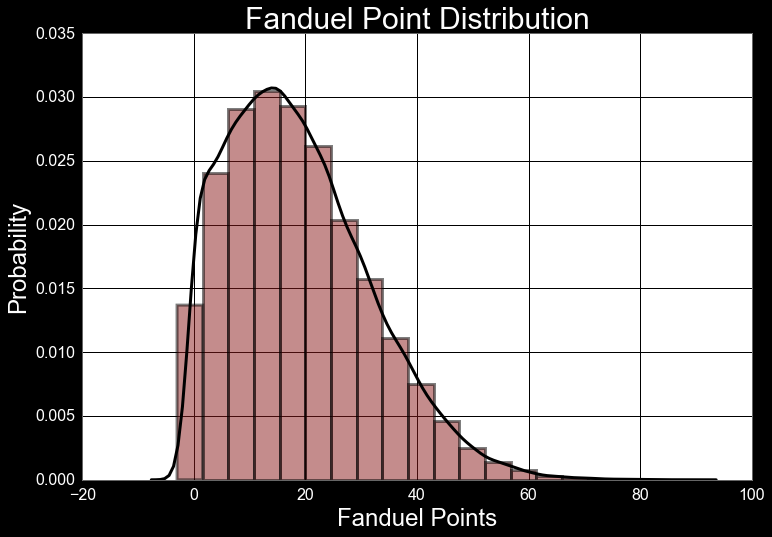

In [79]:
fanduel_pt_dist(df,rc)

In [138]:
rc = {'figure.facecolor': 'black',
      'axes.facecolor': 'white',
      'grid.color': '#b0e2ff',
      'text.color': 'white',
      'ytick.color': 'white',
      'xtick.color': 'white',
      'axes.labelcolor': 'white'}

In [148]:
def reg_plot(xlabel, ylabel, df,rc):
    '''
    Input: 
        xlabel - name of the x-axis label
        ylabel - name of the y-axis label
        df - clean player game log dataframe 
    Output: Scatterplot
    '''
    ax = sns.regplot(x=xlabel, y=ylabel, data=df, scatter=True,color='#000080',
                     scatter_kws={'s':10,'facecolors': '#27408b',
                                  'edgecolors':'black','linewidths': 0.01})
    plt.rcParams['figure.figsize']=(12,8) 
    
    sns.plt.title('Regression Plot',fontsize=30)
    sns.plt.xlabel(xlabel.replace('_',' '), fontsize=24)
    sns.plt.ylabel(ylabel.replace('_',' '), fontsize=24)
    plt.tick_params(axis='both', labelsize=16)
    sns.set_style(style='whitegrid',rc=rc)

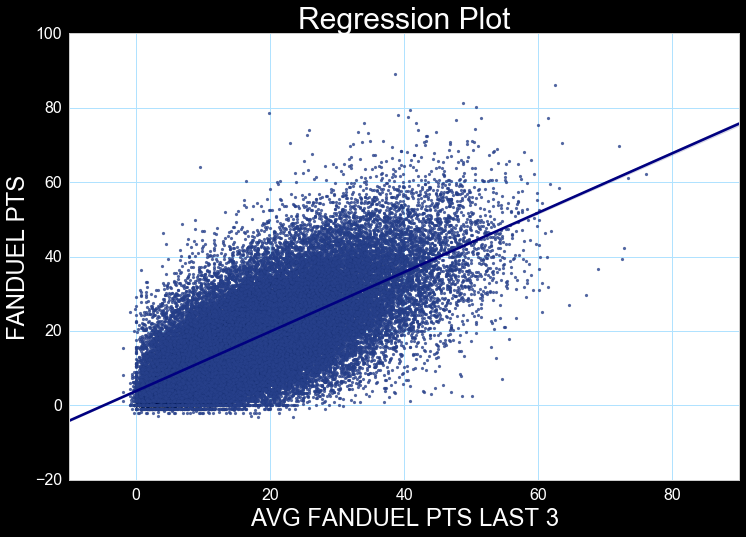

In [149]:
reg_plot('AVG_FANDUEL_PTS_LAST_3','FANDUEL_PTS',df,rc)

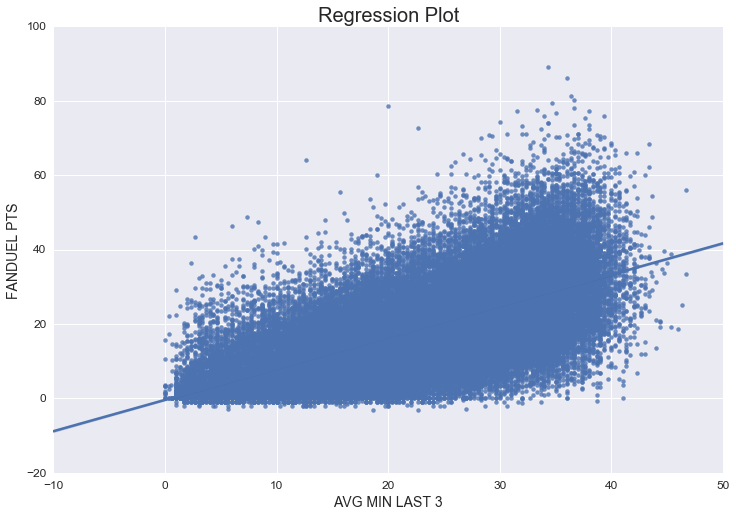

In [309]:
reg_plot('AVG_MIN_LAST_3','FANDUEL_PTS',df)

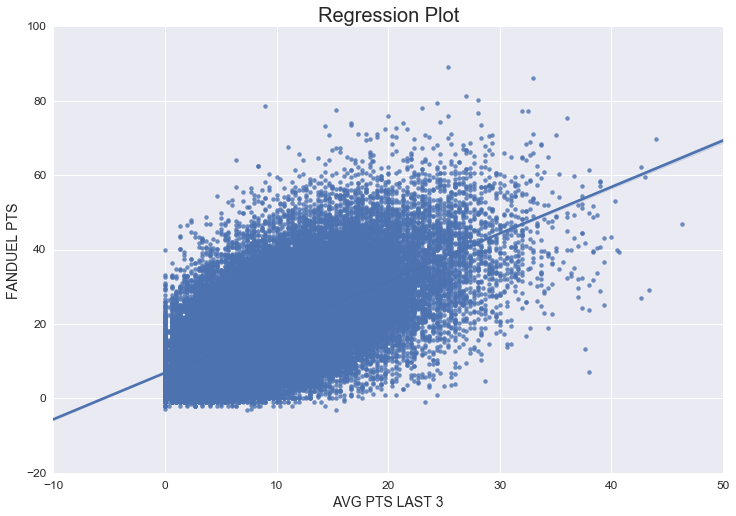

In [310]:
reg_plot('AVG_PTS_LAST_3','FANDUEL_PTS',df)

In [164]:
def hex_plot(xlabel, ylabel, df):
    '''
    Input: 
        xlabel - name of the x-axis label
        ylabel - name of the y-axis label
        df - clean player game log dataframe 
    Output: Scatterplot
    '''
    ax = sns.jointplot(x=xlabel, y=ylabel, data=df, kind="hex",size=14,gridsize=(20,15))
    
    ax.set_axis_labels(xlabel.replace('_',' '), ylabel.replace('_',' '))

    plt.tick_params(axis='both', labelsize=12)
    plt.xlim(-20,40)

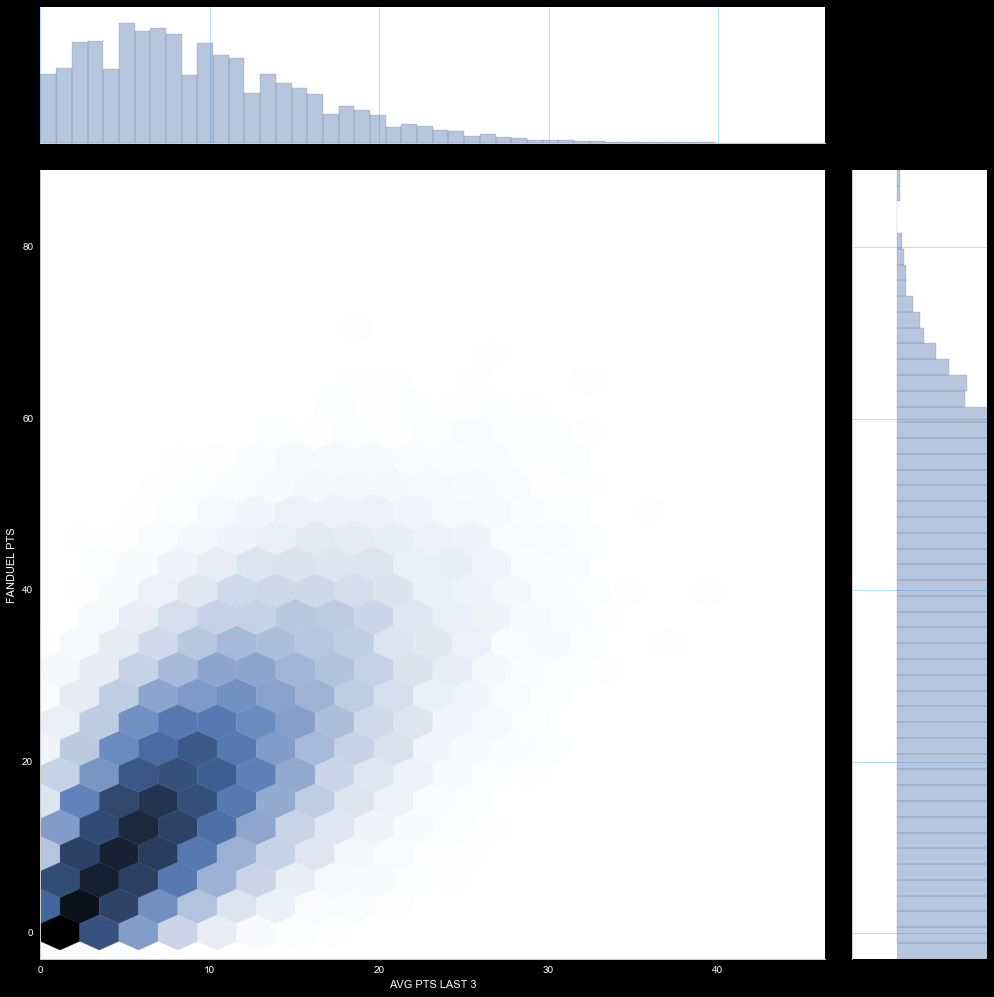

In [166]:
hex_plot('AVG_PTS_LAST_3','FANDUEL_PTS',df)